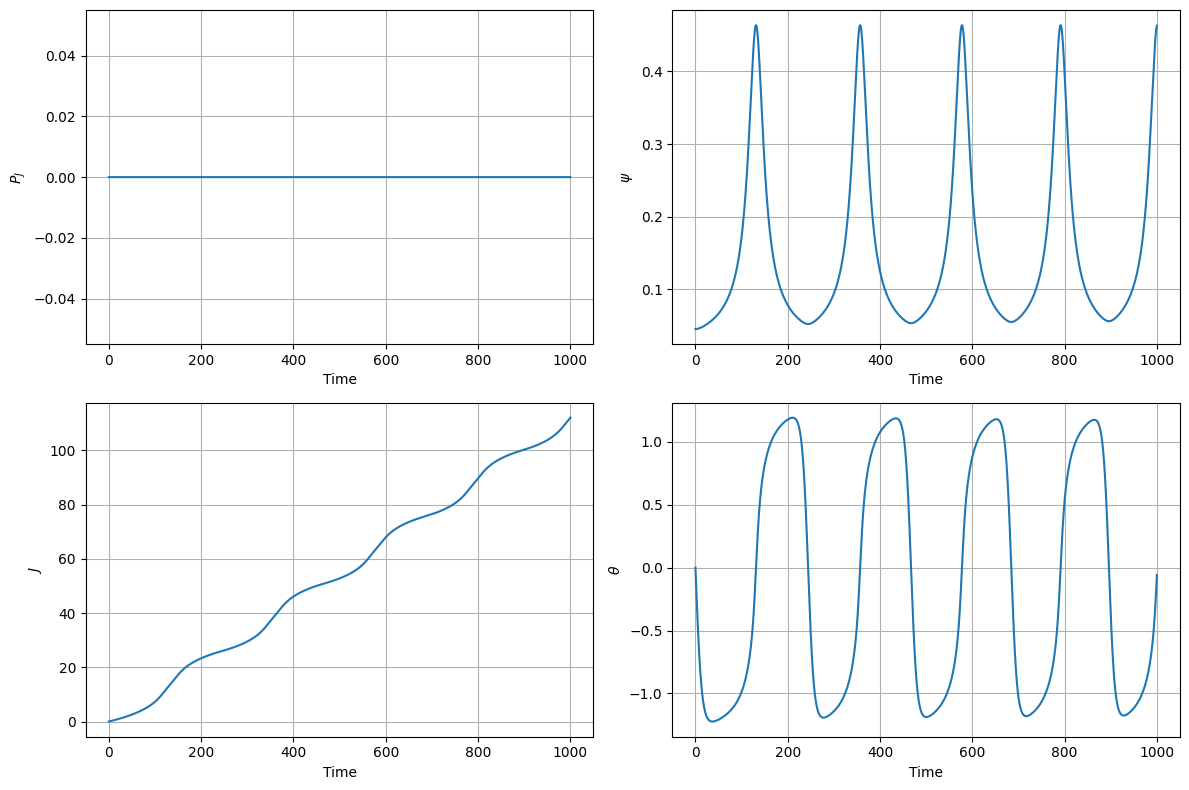

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import Paper_equations
import importlib

# import library with equations
importlib.reload(Paper_equations)

# Initial conditions
t0 = 0
initial_J = 0
initial_psi = 0.045
initial_P_J = -0.0272  # initial_J*(1-(2*initial_psi)**(1/2))
initial_theta = 0

y0 = np.array([initial_J, initial_psi, initial_J, initial_theta])
tf = 1000  # Final time
h = 0.05  # Step size
m = 10 ** (-6)
q_0 = 1
q_wall = 3.5

# Solve the differential equations
t_values = np.linspace(t0, tf, int(tf / h) + 1)
#t_values, y_values = Paper_equations.solve_runge_kutta4(Paper_equations.paper_differential_equations, t0, y0, tf, h, m, q_0)
y_values = Paper_equations.solve_with_odeint(Paper_equations.paper_differential_equations, t0, y0, tf, h, m, q_0)

# Extracting individual components
P_J_values = y_values[:, 0]
psi_values = y_values[:, 1]
J_values = y_values[:, 2]
theta_values = y_values[:, 3]

# Create subplots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(t_values, P_J_values)
plt.xlabel('Time')
plt.ylabel('$P_J$')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t_values, psi_values)
plt.xlabel('Time')
plt.ylabel('$\\psi$')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(t_values, J_values)
plt.xlabel('Time')
plt.ylabel('$J$')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(t_values, theta_values)
plt.xlabel('Time')
plt.ylabel('$\\theta$')
plt.grid(True)

plt.tight_layout()
plt.show()


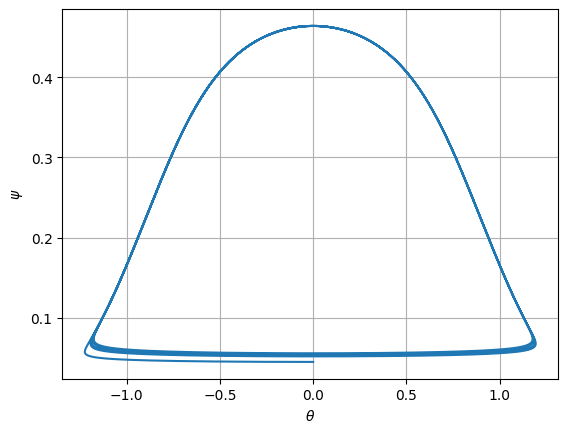

In [8]:
plt.plot(theta_values, psi_values)
plt.xlabel('$\\theta$')
plt.ylabel('$\\psi$')
plt.grid(True)
plt.show()

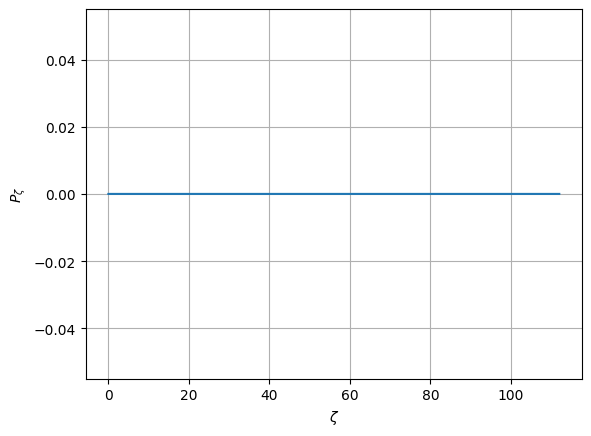

In [9]:
plt.plot(J_values, P_J_values)
plt.xlabel('$\\zeta$')
plt.ylabel('$P_{\\zeta}$')
plt.grid(True)
plt.show()

In [10]:
m_B = 0.5 # keV
P_J = -0.0272
# Generating mesh
# theta, psi = np.meshgrid(theta_values, psi_values)
theta_vals = np.linspace(-np.pi, np.pi, 100)
psi_vals = np.linspace(0, 1.2, 100)
theta, psi = np.meshgrid(theta_vals, psi_vals)
# psi_p = psi/q_0*Paper_equations.calc_hyp2f1(psi.astype(np.float32), q_0, q_wall, 2).astype(np.float64)
psi_p = psi/q_0*Paper_equations.calc_hyp2f1(psi, q_0, q_wall, 2).astype(np.float64)
# Z = ((P_J_values + psi_p)**2*(1 - np.sqrt(2*psi)*np.cos(theta)))/2 + m_B
Z = ((P_J + psi_p)**2*(1 - np.sqrt(2*psi)*np.cos(theta)))/2 + m_B

# Creating a contour plot
contour = plt.contour(theta, psi, Z)

# Adding colorbar
# Define levels for contour lines
levels = np.linspace(np.min(Z), np.max(Z), 200)

# Creating a contour plot with specified levels
contour = plt.contour(theta, psi, Z, levels=levels)
plt.colorbar()
plt.plot(theta_values, psi_values)

# Adding labels and title
plt.xlabel('$\\theta$')
plt.ylabel('$P_{\\theta}$')
plt.title('E - Hamiltonian for $\\mu B = 0.5 keV$')

# Displaying the plot
plt.show()

NameError: name 'm_B' is not defined